# 1.Import Necessary Libraries

In [1]:
!pip install --upgrade scikit-learn==1.3.0 scikeras xgboost tensorflow keras-tuner imbalanced-learn

INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
  Attempting uninstall: tensorfl

In [2]:
import sklearn
import xgboost
import tensorflow

print("sklearn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("tensorflow:", tensorflow.__version__)


sklearn: 1.3.0
xgboost: 2.1.3
tensorflow: 2.18.0


In [3]:
# 1. SETUP & IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import pickle

from sklearn.impute import SimpleImputer
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_score,
    recall_score,
    f1_score
)

# For Keras
import tensorflow as tf
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')



# 2.Load and Inspect the Dataset

In [4]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/Asteroid Collision Dataset V2.csv'
df = pd.read_csv(file_path, low_memory=False)

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("First 5 Rows:\n", df.head())


Mounted at /content/drive
Dataset Shape: (677494, 79)
First 5 Rows:
    diameter  extent  albedo  rot_per  GM  BV  UB  IR spec_B  spec_T  ...  \
0       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
1       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
2       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
3       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   
4       NaN     NaN     NaN      NaN NaN NaN NaN NaN    NaN     NaN  ...   

        rms  two_body  A1  A1_sigma  A2  A2_sigma  A3  A3_sigma  DT  DT_sigma  
0  0.000533       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
1  0.071263       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
2  0.000002       NaN NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
3       NaN         T NaN       NaN NaN       NaN NaN       NaN NaN       NaN  
4  0.339380       NaN NaN       NaN NaN       NaN NaN       NaN NaN       

# 3.Initial EDA


--- Initial EDA (Before Preprocessing) ---

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677494 entries, 0 to 677493
Data columns (total 79 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   diameter        6866 non-null    float64
 1   extent          0 non-null       float64
 2   albedo          6500 non-null    float64
 3   rot_per         1347 non-null    float64
 4   GM              0 non-null       float64
 5   BV              0 non-null       float64
 6   UB              0 non-null       float64
 7   IR              0 non-null       float64
 8   spec_B          50 non-null      object 
 9   spec_T          0 non-null       float64
 10  full_name       677494 non-null  object 
 11  a               677494 non-null  float64
 12  e               677494 non-null  float64
 13  i               677494 non-null  float64
 14  om              677494 non-null  float64
 15  w               677494 non-null  float64


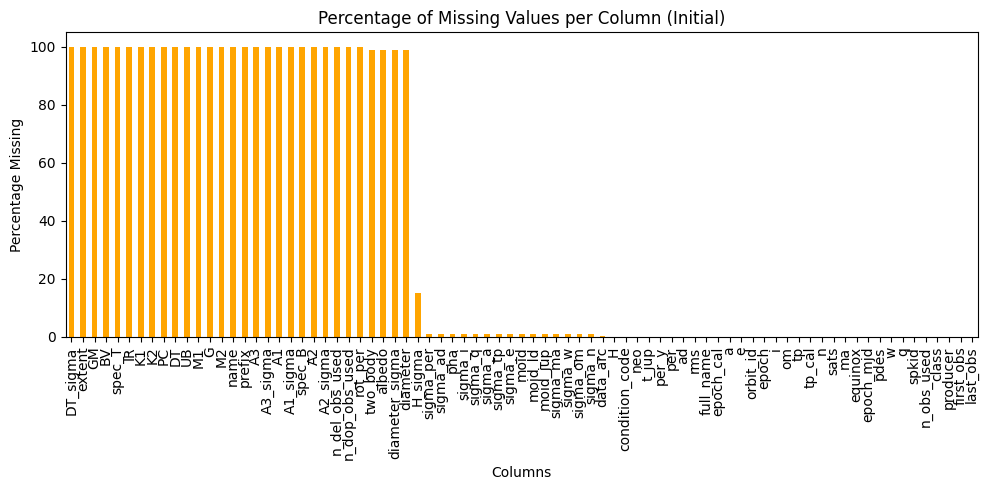

In [5]:
print("\n--- Initial EDA (Before Preprocessing) ---")
# Basic Info
print("\nDataframe Info:")
df.info()

# Statistical Summary
print("\nStatistical Summary of Numeric Columns:")
print(df.describe(include=[np.number]))

# Check missing values again visually
missing_summary = df.isnull().mean().sort_values(ascending=False)*100
print("\nMissing Data Summary (Percentage of Missing Values):\n", missing_summary)

# Plot Missing Values
plt.figure(figsize=(10,5))
missing_summary.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column (Initial)')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.tight_layout()
plt.show()

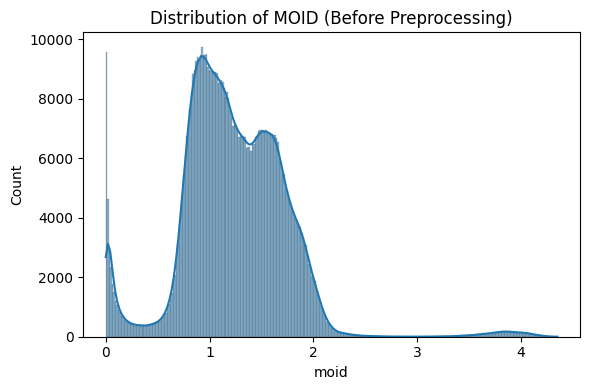

In [6]:
# Distribution of MOID (Before Preprocessing)
if 'moid' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['moid'], kde=True)
    plt.title('Distribution of MOID (Before Preprocessing)')
    plt.tight_layout()
    plt.show()

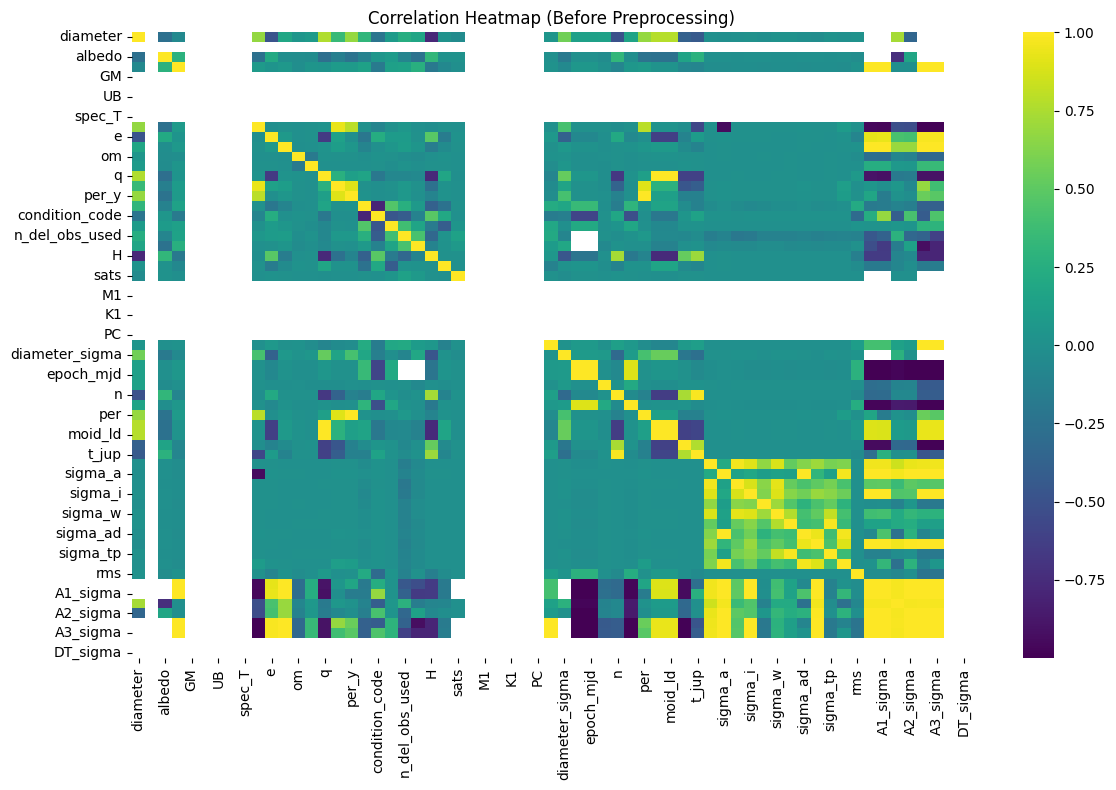

In [7]:
# Correlation Heatmap (Initial)
numeric_cols_initial = df.select_dtypes(include=[np.number]).columns
corr_initial = df[numeric_cols_initial].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_initial, annot=False, cmap='viridis')
plt.title('Correlation Heatmap (Before Preprocessing)')
plt.tight_layout()
plt.show()

# 4.Data Preprocessing

## 4.1. Handle Missing Data

In [8]:
# Analyze missing data
missing_summary = df.isnull().mean().sort_values(ascending=False) * 100
missing_summary = missing_summary[missing_summary > 0]
print("\nMissing Data Summary (Percentage of Missing Values):")
print(missing_summary)

# Drop columns with >90% missing values or irrelevant
cols_to_drop_missing = missing_summary[missing_summary > 90].index.tolist()
irrelevant_columns = ['producer', 'equinox', 'orbit_id', 'pdes', 'full_name', 'name', 'prefix']
cols_to_drop = list(set(cols_to_drop_missing + irrelevant_columns))

cols_to_drop = [col for col in cols_to_drop if col in df.columns]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("\nDropped Columns:")
print(cols_to_drop)


Missing Data Summary (Percentage of Missing Values):
DT_sigma          100.000000
extent            100.000000
GM                100.000000
BV                100.000000
spec_T            100.000000
IR                100.000000
K1                100.000000
K2                100.000000
PC                100.000000
DT                100.000000
UB                100.000000
M1                100.000000
G                 100.000000
M2                100.000000
name               99.999852
prefix             99.999410
A3                 99.998967
A3_sigma           99.998967
A1                 99.997491
A1_sigma           99.997491
spec_B             99.992620
A2                 99.976531
A2_sigma           99.976531
n_del_obs_used     99.910700
n_dop_obs_used     99.910700
rot_per            99.801179
two_body           99.062427
albedo             99.040582
diameter_sigma     98.987002
diameter           98.986559
H_sigma            15.064635
sigma_per           0.937868
sigma_ad          

## 4.2. Impute missing values in numeric columns

In [9]:
# Impute missing values in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

## 4.3. Map Binary Columns

In [10]:
# Map 'Y'/'N' to 1/0 in binary columns
binary_mapping = {'Y': 1, 'N': 0}
for col in ['neo', 'pha']:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

## 4.4. Handle Date Columns

In [11]:
# Convert date columns to datetime and extract year, month, day
date_cols = ['epoch_cal', 'tp_cal', 'first_obs', 'last_obs']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d')
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df.drop(columns=[col], inplace=True)

In [12]:
df.shape

(677494, 52)

## 4.5. One-Hot Encode Categorical Columns

In [13]:
# Identify remaining categorical columns
remaining_categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nRemaining Categorical Columns after Date conversion:", remaining_categorical_cols)

# One-hot encode the 'class' column if it exists
if 'class' in df.columns:
    df = pd.get_dummies(df, columns=['class'], prefix='class', drop_first=True)


Remaining Categorical Columns after Date conversion: ['class']


# 5.Feature Engineering

## 5.1. Add Derived Features

In [14]:
GRAVITATIONAL_CONSTANT = 39.478  # AU^3 / yr^2

# Add derived features
df['relative_orbital_distance'] = np.abs(df['q'] - df['a'] * (1 - df['e']))
df['orbital_velocity'] = np.sqrt(GRAVITATIONAL_CONSTANT / df['a'])
df['adjusted_eccentricity'] = df['e'] * df['a'] / df['q']

## 5.2. Add Perturbed Features

In [15]:
# Perturb orbital elements based on their uncertainties
for col in ['a', 'e', 'q', 'i']:
    sigma_col = f'sigma_{col}'
    if sigma_col in df.columns:
        df[f'{col}_perturbed'] = df[col] + np.random.normal(0, df[sigma_col])

## 5.3. Create Target Variable

In [16]:
# Create 'collision_risk' based on 'moid' (Minimum Orbit Intersection Distance)
df['collision_risk'] = np.where(df['moid'] < 0.05, 1, 0)

# Drop 'moid' and 'moid_ld' from features
features_to_drop = ['moid', 'moid_ld']
df.drop(columns=features_to_drop, inplace=True, errors='ignore')

# 6.Prepare Data for Modeling

## 6.1. Define Features and Target

In [17]:
# Define features and target variable
X = df.drop(columns=['collision_risk'])
y = df['collision_risk']

# Ensure only numeric features are used
X = X.select_dtypes(include=[np.number])

## 6.2. Split the Dataset

In [18]:
# Split the dataset with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 6.3. Handle Missing Values in Training and Testing Sets

In [19]:
# Identify columns with all missing values and drop them
all_missing_cols = X_train.columns[X_train.isnull().all()]
print("Columns with all missing values:", all_missing_cols.tolist())

X_train.drop(columns=all_missing_cols, inplace=True)
X_test.drop(columns=all_missing_cols, inplace=True)

# Re-impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify no missing values remain
print("Missing Values in X_train:", X_train.isnull().sum().sum())
print("Missing Values in X_test:", X_test.isnull().sum().sum())

Columns with all missing values: ['epoch_cal_year', 'epoch_cal_month', 'epoch_cal_day', 'tp_cal_year', 'tp_cal_month', 'tp_cal_day']
Missing Values in X_train: 0
Missing Values in X_test: 0


## 6.4. Handle Class Imbalance with SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled Training Set Shape:", X_train_resampled.shape)
print("Class Distribution After Resampling:\n", y_train_resampled.value_counts())

Resampled Training Set Shape: (1054508, 50)
Class Distribution After Resampling:
 collision_risk
0    527254
1    527254
Name: count, dtype: int64


In [21]:
print("Missing Values in the Entire Dataset:\n", df.isnull().sum())

Missing Values in the Entire Dataset:
 a                 0
e                 0
i                 0
om                0
w                 0
                 ..
a_perturbed       0
e_perturbed       0
q_perturbed       0
i_perturbed       0
collision_risk    0
Length: 66, dtype: int64


## 6.5. Data Scaling

In [22]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# 7.Secondary EDA


--- Secondary EDA (After Preprocessing) ---
Post-Preprocessing X_train_resampled_scaled shape: (1054508, 50)
Class Distribution in y_train_resampled:
 collision_risk
0    527254
1    527254
Name: count, dtype: int64


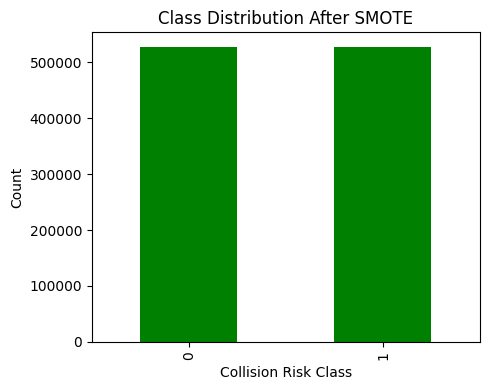

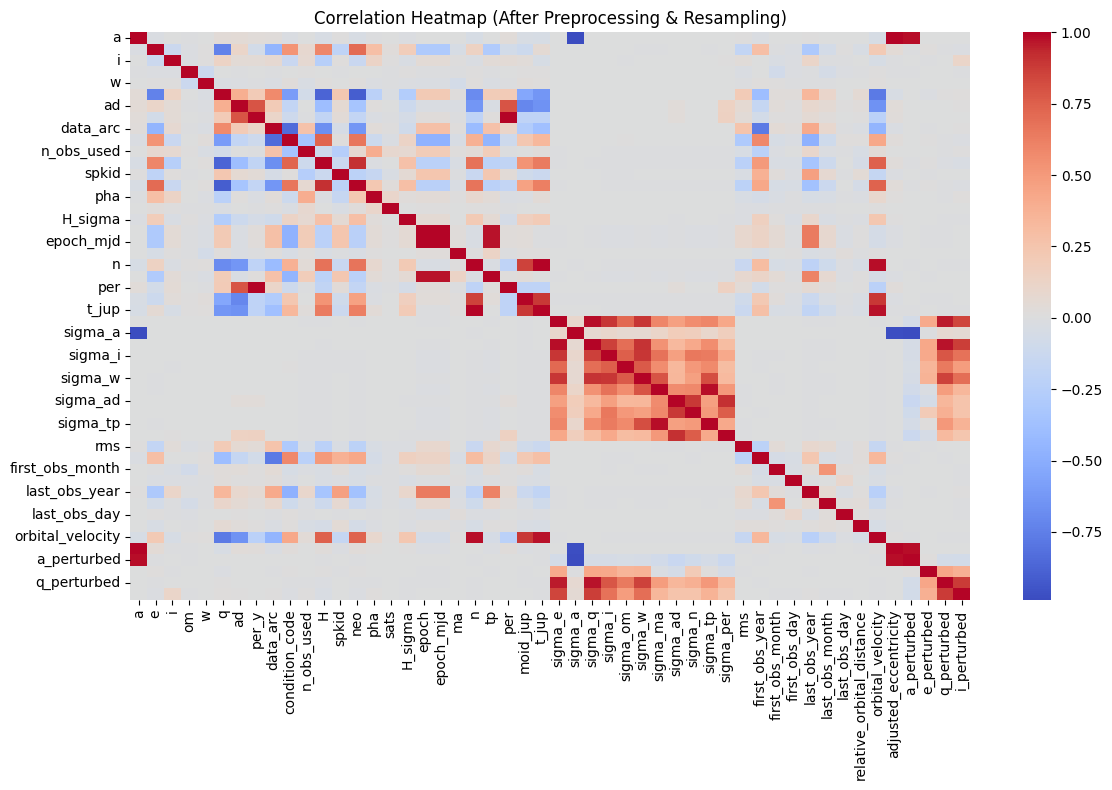

In [23]:
print("\n--- Secondary EDA (After Preprocessing) ---")

# Check the shape and distribution again
print("Post-Preprocessing X_train_resampled_scaled shape:", X_train_resampled_scaled.shape)
print("Class Distribution in y_train_resampled:\n", y_train_resampled.value_counts())

# Plot class distribution after SMOTE
plt.figure(figsize=(5,4))
y_train_resampled.value_counts().plot(kind='bar', color='green')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Collision Risk Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation heatmap after preprocessing (use the X_train after imputation/dropping)
X_train_post = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)
corr_post = pd.DataFrame(X_train_post, columns=X_train.columns).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_post, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (After Preprocessing & Resampling)')
plt.tight_layout()
plt.show()

# 8.Model Training and Evaluation

In [24]:
save_dir = "/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics"

## 8.1 Random Forest Classifier

### 8.1.1 Training the Random Forest

In [25]:
# Instantiate the Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced_subsample'
)

# Fit the model on the resampled training set
rf_model.fit(X_train_resampled_scaled, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       random_state=42)

In [27]:
#Save Random Forest Model and Metrics

rf_model_path = os.path.join(save_dir, "random_forest_model.pkl")
joblib.dump(rf_model, rf_model_path)

['/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/random_forest_model.pkl']

### 8.1.2 Predictions and Evaluation

Random Forest Accuracy: 0.9918

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    131814
           1       0.77      1.00      0.87      3685

    accuracy                           0.99    135499
   macro avg       0.88      0.99      0.93    135499
weighted avg       0.99      0.99      0.99    135499

Random Forest Confusion Matrix:
 [[130713   1101]
 [    13   3672]]


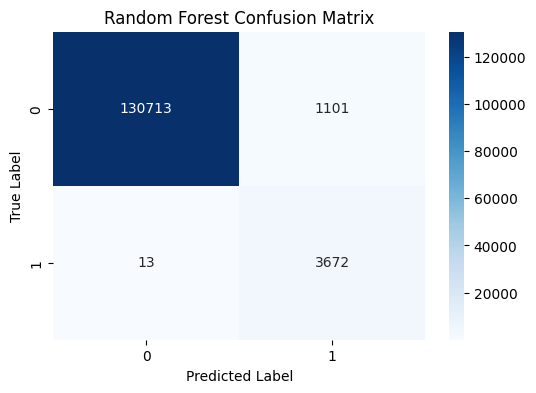

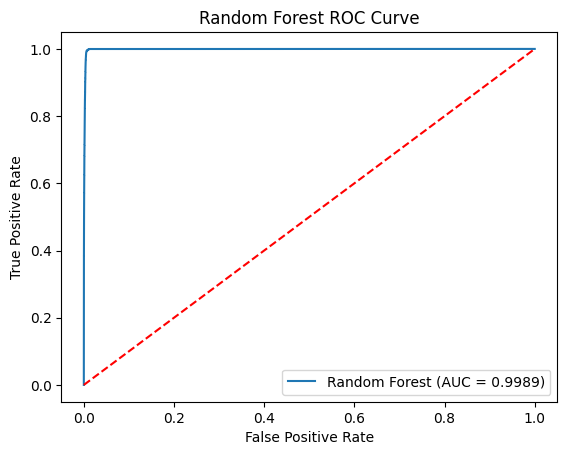

In [29]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate probabilities (for ROC curve and AUC)
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Classification Report
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()


### 8.1.3 Feature Importance (Random Forest)


--- Top 10 Most Important Features (Random Forest) ---
             Feature  Importance
5                  q    0.196112
48       q_perturbed    0.167806
13               neo    0.164431
11                 H    0.082076
20                 n    0.052208
7              per_y    0.048039
44  orbital_velocity    0.043963
22               per    0.035815
46       a_perturbed    0.034529
47       e_perturbed    0.032481


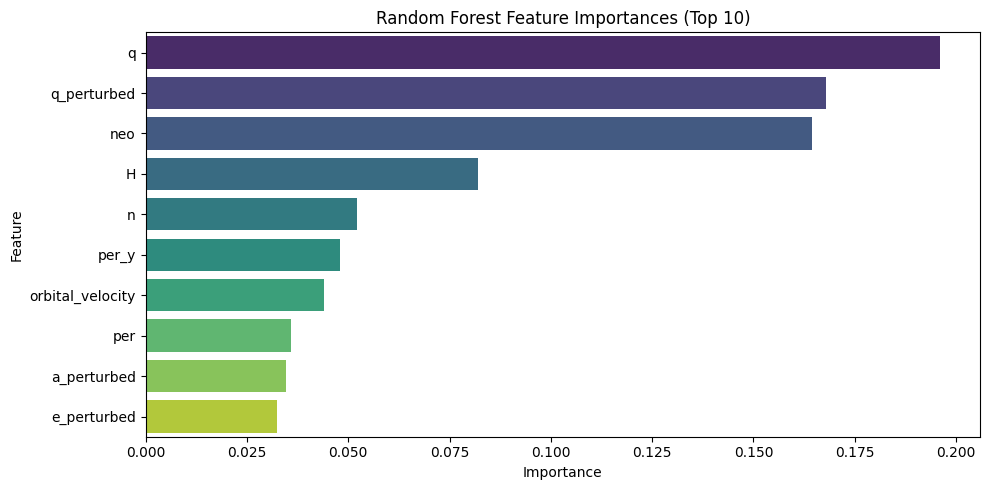

In [30]:
feature_names = X_train.columns
importances = rf_model.feature_importances_

# Create a DataFrame for clarity
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top 10 features
print("\n--- Top 10 Most Important Features (Random Forest) ---")
print(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10,5))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importances (Top 10)')
plt.tight_layout()
plt.show()

## 8.2 XGBoost Classifier

### 8.2.1 Training the XGBoost Model

In [31]:
# Instantiate the XGBClassifier with some basic hyperparameters
# (You can also try Booster='gbtree' or 'dart', tweak learning_rate, etc.)
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the model on the resampled training set
xgb_model.fit(X_train_resampled_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [33]:
#Save XGBoost Model and Metrics

xgb_model_path = os.path.join(save_dir, "xgboost_model.pkl")
joblib.dump(xgb_model, xgb_model_path)

['/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/xgboost_model.pkl']

### 8.2.2 Predictions and Evaluation


XGBoost Accuracy: 0.9955

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131814
           1       0.87      0.99      0.92      3685

    accuracy                           1.00    135499
   macro avg       0.93      0.99      0.96    135499
weighted avg       1.00      1.00      1.00    135499

XGBoost Confusion Matrix:
 [[131247    567]
 [    44   3641]]


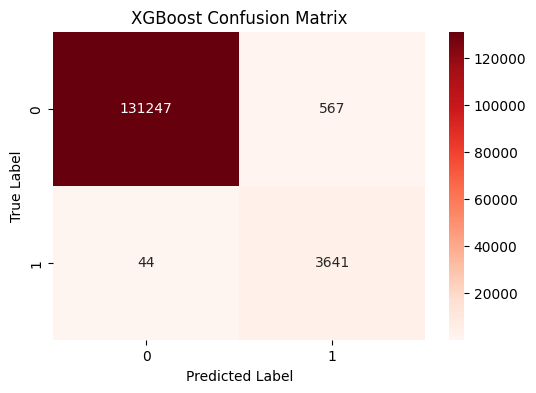

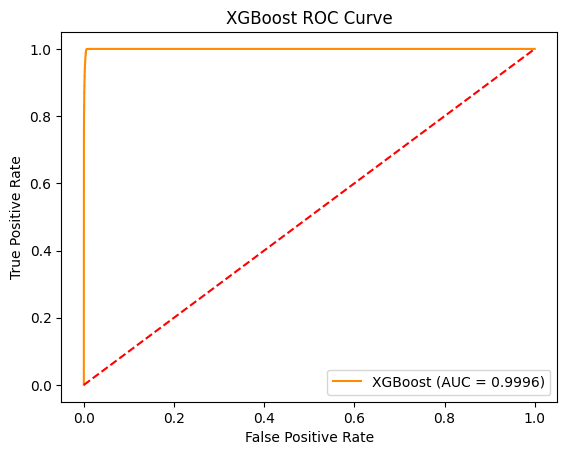

In [36]:
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
# Probability predictions (for ROC curve)
y_pred_xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\nXGBoost Accuracy: {xgb_accuracy:.4f}")

# Classification Report
print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Reds')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

###8.2.3 Feature Importance (XGBoost)


--- Top 10 Most Important Features (XGBoost) ---
                      Feature  Importance
5                           q    0.512143
48                q_perturbed    0.416811
13                        neo    0.020571
14                        pha    0.013668
11                          H    0.004331
43  relative_orbital_distance    0.002447
41             last_obs_month    0.001605
49                i_perturbed    0.001598
9              condition_code    0.001555
7                       per_y    0.001267


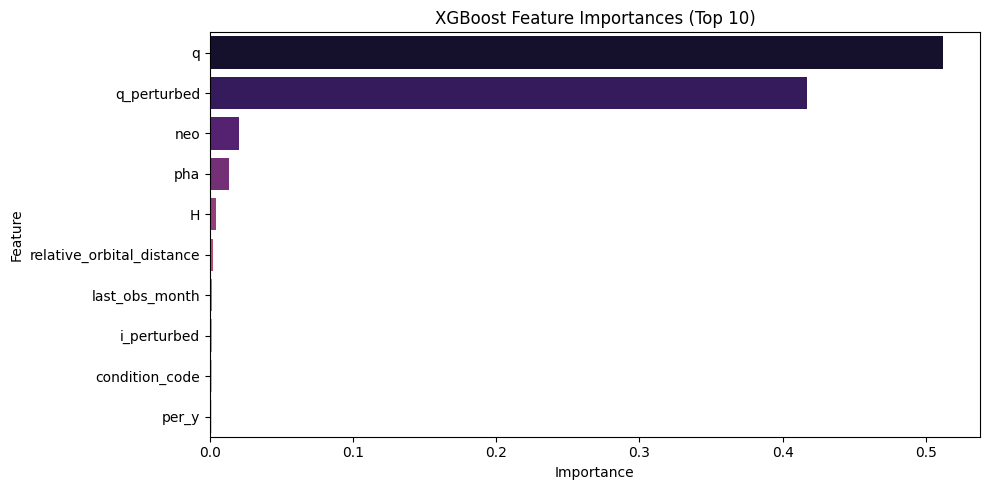

In [37]:
# Extract feature importances from XGBoost
importances_xgb = xgb_model.feature_importances_

# Create a DataFrame
importance_xgb_df = pd.DataFrame({
    'Feature': feature_names,  # same assumption about feature names
    'Importance': importances_xgb
}).sort_values('Importance', ascending=False)

# Top 10 features
print("\n--- Top 10 Most Important Features (XGBoost) ---")
print(importance_xgb_df.head(10))

# Plot feature importances
plt.figure(figsize=(10,5))
sns.barplot(data=importance_xgb_df.head(10), x='Importance', y='Feature', palette='magma')
plt.title('XGBoost Feature Importances (Top 10)')
plt.tight_layout()
plt.show()

## 8.3 Custom Neural Network(Keras)

### 8.3.1 Defining the Model

In [38]:
def create_model(input_dim,
                 hidden_units=[64, 32],
                 dropout_rate=0.2,
                 learning_rate=0.001):
    """
    Creates a custom neural network model in Keras.
    Args:
        input_dim (int): number of input features
        hidden_units (list): list of units for hidden layers
        dropout_rate (float): dropout rate
        learning_rate (float): optimizer learning rate
    Returns:
        model (tf.keras.Model): compiled Keras model
    """
    model = tf.keras.Sequential()

    # Input layer
    model.add(layers.Input(shape=(input_dim,)))

    # Hidden layers
    for units in hidden_units:
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.Dropout(dropout_rate))

    # Output layer (binary classification -> 1 neuron with sigmoid)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

### 8.3.2 Training the Neural Network

In [39]:
# Define input dimension
input_dim = X_train_resampled_scaled.shape[1]

# Create the model
nn_model = create_model(
    input_dim=input_dim,
    hidden_units=[64, 32],
    dropout_rate=0.3,
    learning_rate=0.001
)

# Train the model
history = nn_model.fit(
    X_train_resampled_scaled,
    y_train_resampled,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9895 - loss: 0.0371 - val_accuracy: 0.9993 - val_loss: 0.0076
Epoch 2/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9949 - loss: 0.0173 - val_accuracy: 0.9996 - val_loss: 0.0102
Epoch 3/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9953 - loss: 0.0160 - val_accuracy: 0.9994 - val_loss: 0.0088
Epoch 4/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9956 - loss: 0.0159 - val_accuracy: 0.9996 - val_loss: 0.0079
Epoch 5/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9957 - loss: 0.0152 - val_accuracy: 0.9995 - val_loss: 0.0072
Epoch 6/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9956 - loss: 0.0157 - val_accuracy: 0.9998 - val_loss: 0.0083
Epoch 7/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9957 - loss: 0.0161 - val_accuracy: 0.9992 - val_loss: 0.0095
Epoch 8/20
26363/26363 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 

In [40]:
#Save Neural Network model (Keras)
nn_model_filename = os.path.join(save_dir, "nn_model.h5")
nn_model.save(nn_model_filename)
print(f"Neural Network model saved to: {nn_model_filename}")

Neural Network model saved to: /content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/nn_model.h5


### 8.3.3. Learning Curves (Loss & Accuracy)

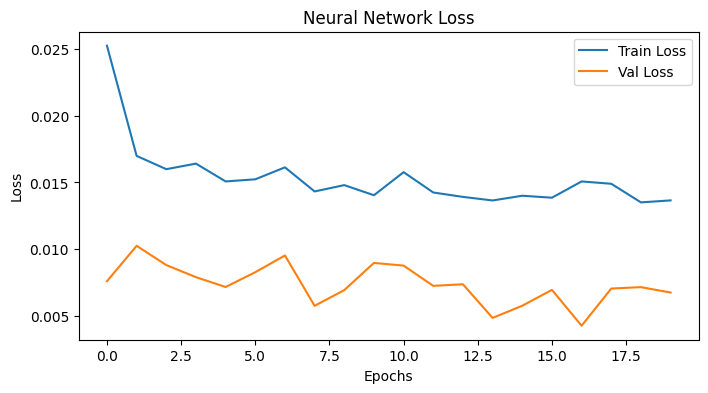

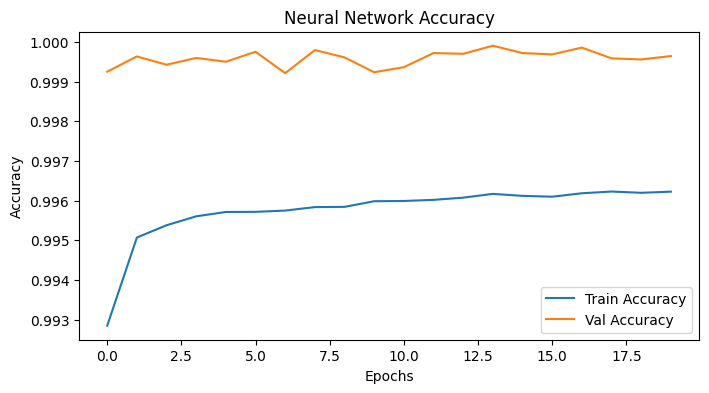

In [42]:
# Plot Training & Validation Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 8.3.4. Evaluation on Test Set

4235/4235 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Neural Network Accuracy: 0.9946

--- Neural Network Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    131814
           1       0.84      0.99      0.91      3685

    accuracy                           0.99    135499
   macro avg       0.92      0.99      0.95    135499
weighted avg       1.00      0.99      0.99    135499

Neural Network Confusion Matrix:
 [[131129    685]
 [    42   3643]]


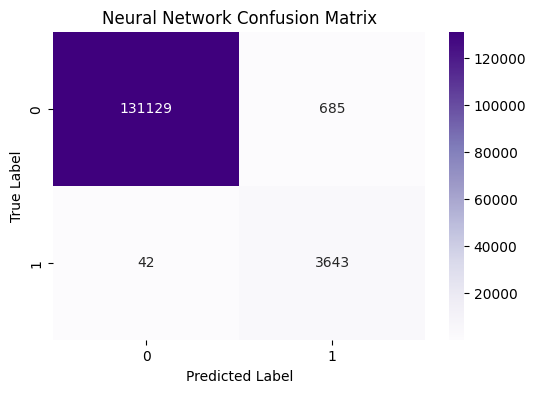

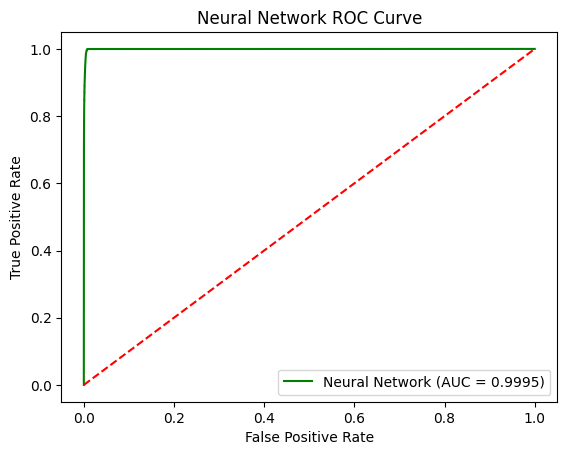

In [43]:
# Predictions on test set
y_pred_nn_proba = nn_model.predict(X_test_scaled).ravel()
# Convert probabilities to 0/1 labels with a threshold (default = 0.5)
y_pred_nn = (y_pred_nn_proba >= 0.5).astype(int)

# Accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"\nNeural Network Accuracy: {nn_accuracy:.4f}")

# Classification Report
print("\n--- Neural Network Classification Report ---")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Neural Network Confusion Matrix:\n", cm_nn)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap='Purples')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_proba)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.figure()
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend()
plt.show()

# 9.Model Comparison

In [44]:
# Calculate precision, recall, fscore for each model
from sklearn.metrics import precision_score, recall_score, f1_score

metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Neural Network'],
    'Accuracy': [rf_accuracy, xgb_accuracy, nn_accuracy],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_nn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_nn)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_nn)
    ],
    'AUC': [roc_auc_rf, roc_auc_xgb, roc_auc_nn]
})

print("\n--- Model Comparison ---")
print(metrics_df)


--- Model Comparison ---
            Model  Accuracy  Precision    Recall  F1-score       AUC
0   Random Forest  0.991779   0.769327  0.996472  0.868290  0.998906
1         XGBoost  0.995491   0.865257  0.988060  0.922590  0.999589
2  Neural Network  0.994635   0.841728  0.988602  0.909272  0.999467


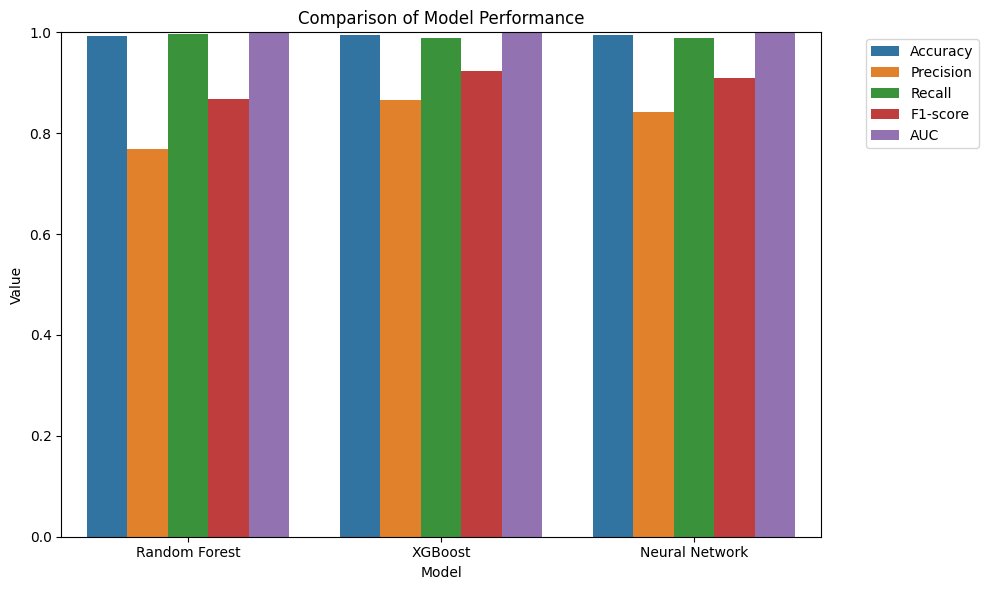

In [45]:
# Melt the DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_melted, x='Model', y='Value', hue='Metric')
plt.title('Comparison of Model Performance')
plt.ylim([0,1])  # All metrics range from 0 to 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 12.Monte Carlo Simulation with Edge Cases

In [ ]:
import joblib
from tensorflow.keras.models import load_model

# Define save directory
save_dir = "/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics"

# Load Random Forest model
rf_model_path = f"{save_dir}/random_forest_model.pkl"
rf_model = joblib.load(rf_model_path)
print("Random Forest model loaded.")

# Load XGBoost model
xgb_model_path = f"{save_dir}/xgboost_model.pkl"
xgb_model = joblib.load(xgb_model_path)
print("XGBoost model loaded.")

# Load Neural Network model
nn_model_path = f"{save_dir}/nn_model.h5"
nn_model = load_model(nn_model_path)
print("Neural Network model loaded.")

# Verify successful loading
print("All models loaded successfully!")


## 12.1 Monte Carlo Simulation Setup

In [ ]:
from scipy.stats import norm

In [ ]:
# Identify the feature ranges from dataset
feature_ranges = {
    'a': (0.1, 50),  # Semi-major axis range
    'e': (0, 1),     # Eccentricity range
    'i': (0, 180),   # Inclination range
    'q': (0.01, 2),  # Perihelion distance
}

## 12.2 Generate Edge Case Data

In [ ]:
# Define edge cases by sampling at the extremes and adding random noise
def generate_edge_cases(feature_ranges, n_samples=100):
    edge_case_data = []

    for feature, (low, high) in feature_ranges.items():
        # Extreme low values
        low_values = np.random.uniform(low - 0.1 * low, low + 0.1 * low, n_samples // 2)
        # Extreme high values
        high_values = np.random.uniform(high - 0.1 * high, high + 0.1 * high, n_samples // 2)
        edge_case_data.append(np.concatenate([low_values, high_values]))

    edge_cases = np.column_stack(edge_case_data)
    return pd.DataFrame(edge_cases, columns=feature_ranges.keys())

edge_cases = generate_edge_cases(feature_ranges, n_samples=1000)
print("Generated Edge Cases:")
print(edge_cases.head())

In [ ]:
# Scale Edge Cases
scaler = StandardScaler()  # Use the same scaler fitted on the original data
edge_cases_scaled = scaler.fit_transform(edge_cases)

## 12.3 Perform Monte Carlo Simulations

In [ ]:
# Get predictions from each model
rf_predictions = rf_model.predict_proba(edge_cases_scaled)[:, 1]
xgb_predictions = xgb_model.predict_proba(edge_cases_scaled)[:, 1]
nn_predictions = nn_model.predict(edge_cases_scaled).ravel()

# Combine results
simulation_results = pd.DataFrame({
    'RF_Predictions': rf_predictions,
    'XGB_Predictions': xgb_predictions,
    'NN_Predictions': nn_predictions,
    'a': edge_cases['a'],
    'e': edge_cases['e'],
    'i': edge_cases['i'],
    'q': edge_cases['q'],
})
print(simulation_results.head())

## 12.4 Evaluate Edge Cases

In [ ]:
# Compute summary statistics
summary_stats = simulation_results.describe()
print("\nSummary Statistics of Predictions:")
print(summary_stats)

# Pairplot to see trends in predictions for edge cases
sns.pairplot(simulation_results, vars=['RF_Predictions', 'XGB_Predictions', 'NN_Predictions'], diag_kind='kde')
plt.suptitle('Monte Carlo Simulation Results on Edge Cases', y=1.02)
plt.show()

# Distribution of predictions for a specific edge case scenario
plt.figure(figsize=(10, 6))
sns.kdeplot(rf_predictions, label='Random Forest', shade=True)
sns.kdeplot(xgb_predictions, label='XGBoost', shade=True)
sns.kdeplot(nn_predictions, label='Neural Network', shade=True)
plt.title('Prediction Distributions for Edge Cases')
plt.xlabel('Prediction Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

# 14.Dashboard

##14.1 Integration of Results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ================================================
# Consolidate Monte Carlo Results
# ================================================

# Combine Monte Carlo results into a DataFrame
monte_carlo_summary = pd.DataFrame([
    {
        'Model': model_name,
        'Metric': 'ROC-AUC',
        'Mean': np.mean(metrics['roc_auc']),
        'Std': np.std(metrics['roc_auc'])
    }
    for model_name, metrics in simulation_results.items()
] + [
    {
        'Model': model_name,
        'Metric': 'F1-Score',
        'Mean': np.mean(metrics['f1_score']),
        'Std': np.std(metrics['f1_score'])
    }
    for model_name, metrics in simulation_results.items()
])

# Combine Edge Case results into a DataFrame
edge_case_summary = pd.DataFrame([
    {
        'Model': model_name,
        'Metric': 'ROC-AUC',
        'Value': metrics['roc_auc']
    }
    for model_name, metrics in edge_case_results.items()
] + [
    {
        'Model': model_name,
        'Metric': 'F1-Score',
        'Value': metrics['f1_score']
    }
    for model_name, metrics in edge_case_results.items()
])

# ================================================
# Visualize Monte Carlo Results
# ================================================

# Plot Monte Carlo ROC-AUC Distributions
plt.figure(figsize=(10, 6))
for model_name, metrics in simulation_results.items():
    plt.hist(metrics['roc_auc'], bins=30, alpha=0.6, label=f'{model_name} ROC-AUC')
plt.title('Monte Carlo Simulation: ROC-AUC Distribution')
plt.xlabel('ROC-AUC')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Monte Carlo F1-Score Distributions
plt.figure(figsize=(10, 6))
for model_name, metrics in simulation_results.items():
    plt.hist(metrics['f1_score'], bins=30, alpha=0.6, label=f'{model_name} F1-Score')
plt.title('Monte Carlo Simulation: F1-Score Distribution')
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# ================================================
# Visualize Edge Case Results
# ================================================

# Bar plot for Edge Case Results
for metric in ['ROC-AUC', 'F1-Score']:
    edge_case_metric = edge_case_summary[edge_case_summary['Metric'] == metric]
    plt.figure(figsize=(8, 5))
    plt.bar(edge_case_metric['Model'], edge_case_metric['Value'], alpha=0.7)
    plt.title(f'Edge Case Results: {metric}')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# ================================================
# Save Results for Report Integration
# ================================================

# Save Monte Carlo and Edge Case summaries as CSV
monte_carlo_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/monte_carlo_summary.csv'
edge_case_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/edge_case_summary.csv'

monte_carlo_summary.to_csv(monte_carlo_summary_path, index=False)
edge_case_summary.to_csv(edge_case_summary_path, index=False)

print(f"Monte Carlo Summary saved to {monte_carlo_summary_path}")
print(f"Edge Case Summary saved to {edge_case_summary_path}")

# ================================================
# Generate Summary for Dashboard
# ================================================

from IPython.display import display

print("\n--- Monte Carlo Summary ---")
display(monte_carlo_summary)

print("\n--- Edge Case Summary ---")
display(edge_case_summary)



## 14.2 Monte Carlo Simulation and Edge Case Analysis Dashboard

In [ ]:
pip install streamlit

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ================================================
# Load Monte Carlo and Edge Case Results
# ================================================

# File paths for summaries
monte_carlo_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/monte_carlo_summary.csv'
edge_case_summary_path = '/content/drive/My Drive/Predictive_Modeling_for_Asteroid_Collision_Risk_Using_Machine_Learning_and_Orbital_Dynamics/edge_case_summary.csv'

# Load summaries
monte_carlo_summary = pd.read_csv(monte_carlo_summary_path)
edge_case_summary = pd.read_csv(edge_case_summary_path)

# ================================================
# Streamlit App
# ================================================

st.title("Monte Carlo Simulation and Edge Case Analysis Dashboard")

# ================================================
# Monte Carlo Summary Section
# ================================================

st.header("Monte Carlo Simulation Results")

# Select Metric
metric = st.selectbox("Select Metric to View", ["ROC-AUC", "F1-Score"])

# Filter Monte Carlo Summary
filtered_summary = monte_carlo_summary[monte_carlo_summary["Metric"] == metric]

# Display Table
st.subheader(f"Monte Carlo Results for {metric}")
st.dataframe(filtered_summary)

# Plot Monte Carlo Results
st.subheader(f"Monte Carlo {metric} Distributions")
plt.figure(figsize=(10, 6))
for model in filtered_summary["Model"].unique():
    data = filtered_summary[filtered_summary["Model"] == model]
    plt.bar(data["Model"], data["Mean"], yerr=data["Std"], alpha=0.7, label=model)
plt.title(f"{metric} Distribution Across Models")
plt.xlabel("Model")
plt.ylabel(f"{metric}")
plt.legend()
st.pyplot(plt)

# ================================================
# Edge Case Results Section
# ================================================

st.header("Edge Case Analysis")

# Select Metric
edge_metric = st.selectbox("Select Edge Case Metric", ["ROC-AUC", "F1-Score"], index=0)

# Filter Edge Case Summary
filtered_edge_case = edge_case_summary[edge_case_summary["Metric"] == edge_metric]

# Display Edge Case Table
st.subheader(f"Edge Case Results for {edge_metric}")
st.dataframe(filtered_edge_case)

# Plot Edge Case Results
st.subheader(f"Edge Case {edge_metric} Comparison")
plt.figure(figsize=(8, 5))
plt.bar(filtered_edge_case["Model"], filtered_edge_case["Value"], alpha=0.7)
plt.title(f"Edge Case {edge_metric} Across Models")
plt.xlabel("Model")
plt.ylabel(edge_metric)
plt.tight_layout()
st.pyplot(plt)

# ================================================
# Final Summary
# ================================================

st.header("Summary and Insights")

st.markdown("""
This dashboard provides a comprehensive analysis of model performance using:
- Monte Carlo simulations for robustness testing.
- Edge case analysis for high-risk scenario evaluations.

Use the filters above to explore the metrics and gain insights into model reliability and stability under varying conditions.
""")
